In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
from statistics import mean
from sklearn.datasets import load_iris

pd.set_option('max_columns', 10)

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
pyber_city_df = pd.read_csv(city_data_to_load, low_memory=False)

In [2]:
pyber_ride_df = pd.read_csv(ride_data_to_load, low_memory=False)

In [3]:
# Combine the data into a single dataset
merge_tab = pd.merge(pyber_ride_df, pyber_city_df, on="city", how="inner")
merge_table = merge_tab.rename(columns={"type": "City_type"}) 
merge_table.head()
# Display the data table for preview

,city,date,fare,ride_id,driver_count,City_type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [4]:
merge_table_grouped = merge_table.groupby(["city"]).agg({'driver_count': [sum], 'ride_id': pd.Series.nunique, 'fare': [mean], 'City_type': pd.Series.unique})
merge_table_grouped.head()
# math_school_groupby = school_df.groupby(["school_name"]).agg({'math_score': [mean]})

,driver_count,ride_id,fare,City_type
,sum,nunique,mean,unique
city,,,,
Amandaburgh,216,18,24.641667,Urban
Barajasview,572,22,25.332273,Urban
Barronchester,176,16,36.422500,Suburban
Bethanyland,396,18,32.956111,Suburban
Bradshawfurt,70,10,40.064000,Rural


In [5]:
merge_table_grouped.index

Index(['Amandaburgh', 'Barajasview', 'Barronchester', 'Bethanyland',
       'Bradshawfurt', 'Brandonfort', 'Carriemouth', 'Christopherfurt',
       'Colemanland', 'Davidfurt',
       ...
       'West Heather', 'West Heidi', 'West Josephberg', 'West Kimmouth',
       'West Patrickchester', 'West Robert', 'West Samuelburgh',
       'Williamsonville', 'Williamsstad', 'Williamsview'],
      dtype='object', name='city', length=120)

In [6]:
# pyber_driver = merge_table.groupby(["city"]).sum()["driver_count"]
# pyber_driver.head()

In [7]:
# pyber_fare = merge_table.groupby(["city"]).mean()["fare"]
# pyber_fare.head()

In [8]:
# pyber_rider = merge_table.groupby(["city"]).nunique()["ride_id"]
# pyber_rider.head()

In [9]:
# pyber_type = merge_table.groupby(["city"]).max()["type"]
# pyber_type = merge_table.groupby("city")["City_type"].value_counts().sort_values()
# pyber_type = merge_table.groupby(["city"])["City_type"]
# pyber_type.head()

In [10]:
# a_series = merge_table_grouped['City_type'].copy()
# a_series.head()

In [11]:
# merge_table["color"] = merge_table["City_type"].map(mapping_dictionary)
merge_table_grouped['color']=merge_table_grouped["City_type"].replace({'Urban': 'Coral', 'Suburban': 'Skyblue', 'Rural': 'Gold'})
# new_column = merge_table["type"]
# merge_table["color"] = new_column
merge_table_grouped.head()

,driver_count,ride_id,fare,City_type,color
,sum,nunique,mean,unique,
city,,,,,
Amandaburgh,216,18,24.641667,Urban,Coral
Barajasview,572,22,25.332273,Urban,Coral
Barronchester,176,16,36.422500,Suburban,Skyblue
Bethanyland,396,18,32.956111,Suburban,Skyblue
Bradshawfurt,70,10,40.064000,Rural,Gold


In [12]:
# merge_table_grouped.columns.map('{0[0]}_{0[1]}'.format)
merge_table_grouped.columns = list(map('_'.join, merge_table_grouped.columns.values))

In [13]:
Pyber_df = merge_table_grouped.rename(columns={'driver_count_sum': "Total # of Drivers per City", 
                                                         "ride_id_nunique": "Total # of Rides per City", 
                                                         "fare_mean": "Average Fare per City", 
                                                         "City_type_unique": "City Type",
                                                         "color_": "Bubble Color"}) 
Pyber_df.head()

,Total # of Drivers per City,Total # of Rides per City,Average Fare per City,City Type,Bubble Color
city,,,,,
Amandaburgh,216,18,24.641667,Urban,Coral
Barajasview,572,22,25.332273,Urban,Coral
Barronchester,176,16,36.422500,Suburban,Skyblue
Bethanyland,396,18,32.956111,Suburban,Skyblue
Bradshawfurt,70,10,40.064000,Rural,Gold


In [14]:
Pyber_df.index

Index(['Amandaburgh', 'Barajasview', 'Barronchester', 'Bethanyland',
       'Bradshawfurt', 'Brandonfort', 'Carriemouth', 'Christopherfurt',
       'Colemanland', 'Davidfurt',
       ...
       'West Heather', 'West Heidi', 'West Josephberg', 'West Kimmouth',
       'West Patrickchester', 'West Robert', 'West Samuelburgh',
       'Williamsonville', 'Williamsstad', 'Williamsview'],
      dtype='object', name='city', length=120)

In [15]:
# Pyber_data_df = Pyber_df.set_index('City Type')
# Pyber_data_df.index

In [16]:
Pyber_data_df = Pyber_df.reset_index(level = "city")
Pyber_data_df.head()

,city,Total # of Drivers per City,Total # of Rides per City,Average Fare per City,City Type,Bubble Color
0,Amandaburgh,216,18,24.641667,Urban,Coral
1,Barajasview,572,22,25.332273,Urban,Coral
2,Barronchester,176,16,36.422500,Suburban,Skyblue
3,Bethanyland,396,18,32.956111,Suburban,Skyblue
4,Bradshawfurt,70,10,40.064000,Rural,Gold


In [17]:
Pyber_data_df.dtypes

city                            object
Total # of Drivers per City      int64
Total # of Rides per City        int64
Average Fare per City          float64
City Type                       object
Bubble Color                    object
dtype: object

In [18]:
Bubble_Color_uniq = Pyber_data_df["Bubble Color"].drop_duplicates(keep='first', inplace=False)
Bubble_Color_uniq

0      Coral
2    Skyblue
4       Gold
Name: Bubble Color, dtype: object

In [19]:
City_Type_uniq = Pyber_data_df["City Type"].drop_duplicates(keep='first', inplace=False)
City_Type_uniq

0       Urban
2    Suburban
4       Rural
Name: City Type, dtype: object

## Bubble Plot of Ride Sharing Data

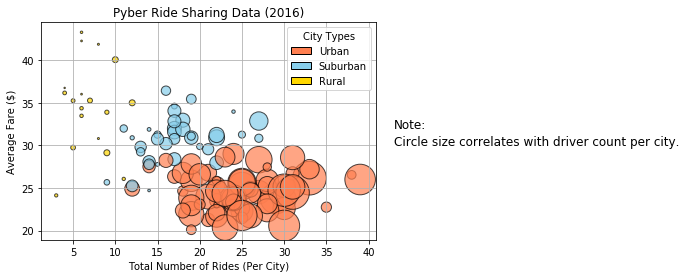

In [21]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
plt.scatter(x=Pyber_data_df['Total # of Rides per City'],
            y=Pyber_data_df['Average Fare per City'],
           s=Pyber_data_df['Total # of Drivers per City']/2,
           alpha=0.7,
           c=Pyber_data_df['Bubble Color'], edgecolors='black')

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.text(43, 32, r'Note:',
         fontsize=12)
plt.text(43, 30, r'Circle size correlates with driver count per city.',
         fontsize=12)
coral_patch = mpatches.Circle([0.5, 0.5], 0.25, facecolor='coral', edgecolor='black', linewidth=1, label='Urban')
skyblue_patch = mpatches.Circle([0,0], facecolor='skyblue', edgecolor='black', linewidth=1, label='Suburban')
gold_patch = mpatches.Circle([0,0], facecolor='gold', edgecolor='black', linewidth=1, label='Rural')
plt.legend(handles=[coral_patch, skyblue_patch, gold_patch], title='City Types')
plt.savefig('Bubble.png')
plt.show()

In [21]:
# x,y = Pyber_data_df['Total # of Rides per City'], Pyber_data_df['Average Fare per City']
# for i, txt in enumerate(Pyber_data_df['City Type']):
#     plt.annotate(txt, (x[i]), (y[i]))
#     print(i, txt, x[i], y[i], Pyber_data_df['Total # of Drivers per City'][i], Pyber_data_df['Bubble Color'][i])
    

In [94]:
# Create a legend
# City_type_list = list(Pyber_data_df['City Type'])
# bubble_color_list = list(Pyber_data_df['Bubble Color'])
# City_type_list
# bubble_color_list

In [109]:
# l = []
# for i in range (0, len(Pyber_data_df)):
#     l.append(mpatches.Patch(color=bubble_color_list[i],
#                         alpha=0.5,
#                         label=City_type_list[i])

# plt.legend(handles=l, loc = "upper right")
# plt.show()

## Total Fares by City Type

In [40]:
# Calculate Type Percents
pyber_fares = merge_table.groupby(["City_type"]).sum()["fare"]
# pyber_rides.head()
pyber_fares_total = merge_table["fare"].sum()
# pyber_rides_total
pyber_fares_perc = (pyber_fares / pyber_fares_total) * 100
pyber_fares_perc

City_type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

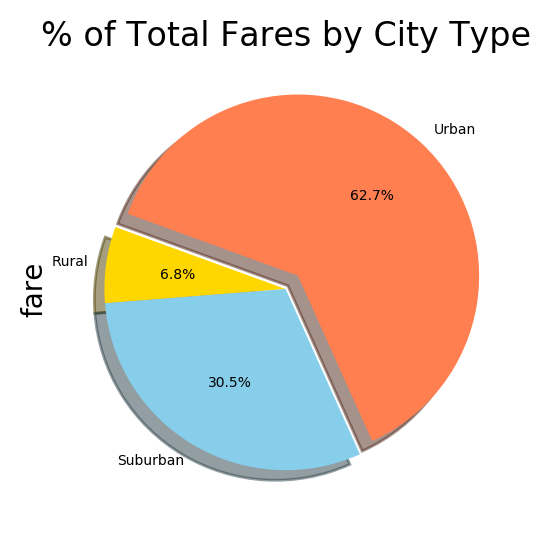

In [45]:
# Build Pie Chart

fig = plt.figure(figsize=(3,3), dpi=200)
ax = plt.subplot(111)
labels = ["Rural", "Suburban", "Urban"]
colors = ["Gold", "Skyblue", "Coral"]

pyber_fares_perc.plot(kind='pie', ax=ax, shadow=True, labels=labels, explode = (0, 0, 0.1), colors=colors, autopct='%1.1f%%', startangle=160, fontsize=5)

# Save Figure
ax.get_figure().suptitle("")
plt.title("% of Total Fares by City Type")
plt.savefig('Fares_pie.png')
# Show Figure
plt.show()

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

In [37]:
# Calculate Ride Percents
pyber_rides = Pyber_data_df.groupby(["City Type"]).sum()["Total # of Rides per City"]
# pyber_rides.head()
pyber_rides_total = Pyber_data_df["Total # of Rides per City"].sum()
# pyber_rides_total
pyber_rides_perc = (pyber_rides / pyber_rides_total) * 100
pyber_rides_perc

City Type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: Total # of Rides per City, dtype: float64

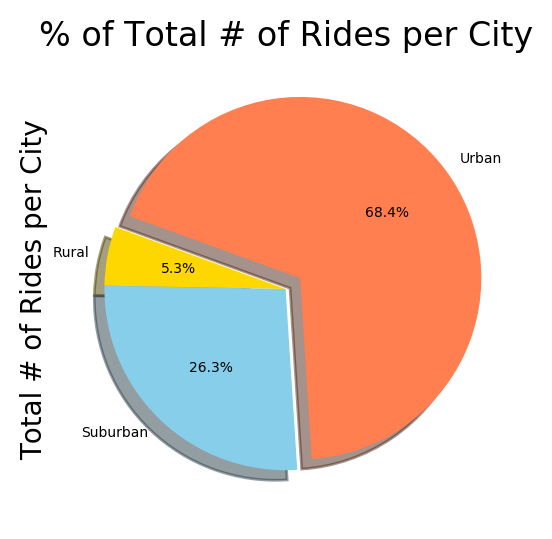

In [38]:
# Build Pie Chart

fig = plt.figure(figsize=(3,3), dpi=200)
ax = plt.subplot(111)
labels = ["Rural", "Suburban", "Urban"]
colors = ["Gold", "Skyblue", "Coral"]

pyber_rides_perc.plot(kind='pie', ax=ax, shadow=True, labels=labels, explode = (0, 0, 0.1), colors=colors, autopct='%1.1f%%', startangle=160, fontsize=5)
# Save Figure
plt.title("% of Total # of Rides per City")
plt.savefig('Rides_pie.png')
# Show Figure
plt.show()

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [30]:
# Calculate Driver Percents
# pyber_drivers = Pyber_data_df.groupby(["City Type"]).sum()["Total # of Drivers per City"]
pyber_drivers = merge_table.groupby(["City_type"]).sum()["driver_count"]
pyber_drivers_total = merge_table.sum()["driver_count"]
pyber_drivers_perc = (pyber_drivers / pyber_drivers_total) * 100
pyber_drivers_perc

City_type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

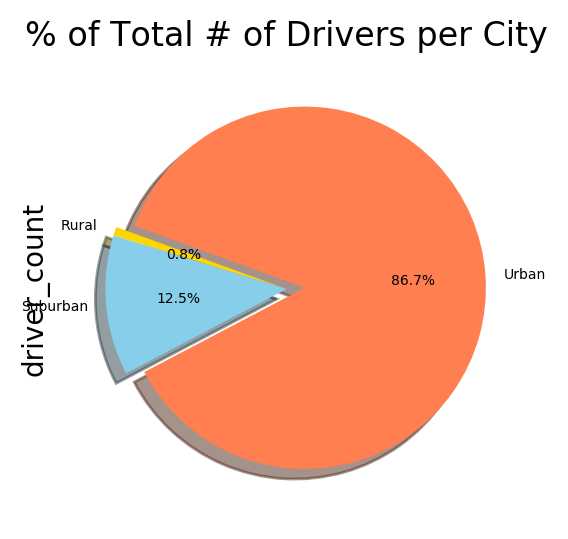

In [44]:
# Build Pie Charts

fig = plt.figure(figsize=(3,3), dpi=200)
ax = plt.subplot(111)
labels = ["Rural", "Suburban", "Urban"]
colors = ["Gold", "Skyblue", "Coral"]

pyber_drivers_perc.plot(kind='pie', ax=ax, shadow=True, labels=labels, explode = (0, 0, 0.1), colors=colors, autopct='%1.1f%%', startangle=160, fontsize=5)
# par(ann=FALSE)


# Save Figure
plt.title("% of Total # of Drivers per City")
plt.savefig('Drivers_pie.png')
# Show Figure
plt.show()

In [ ]:
# Show Figure
plt.show()